In [ ]:
import pandas as pd

## A. Statewise Trend Analysis of Aadhaar Updates 2025(Univariate)

This section performs a **statewise univariate trend analysis** of Aadhaar update activity for the year **2025**, separately for **biometric** and **demographic** updates.


The objective is to understand **how update volumes evolve over time**. Trend behaviour provides early signals on **system stability**, **operational consistency**, and potential **data freshness risks**.



### Data being analysed
- Monthly update counts (**January–December**) for each state  
- Separate analysis for **biometric** and **demographic** updates  



### Inference
- **Stable trends** indicate routine and predictable update behaviour  
- **Declining trends** may signal emerging data staleness risk  
- **Sharp spikes** suggest reactive or policy-driven enrolment or update activity  



### Analysis focuses on
- Month-on-month movement  
- Seasonal peaks and troughs  
- Structural shifts (sudden rise or fall)  
- Overall smoothness versus volatility of trends  



This analysis establishes a **baseline understanding of update behaviour**, which will be used in subsequent **intensity and risk assessments**.


In [47]:
import pandas as pd
import matplotlib.pyplot as plt


MONTHS = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.style.use("default")


# FUNCTION: THAT CREATES STATEWISE TREND PLOTS

def plot_statewise_trends(df, title_prefix):
    """
    Generates clean monthly trend plots with rolling averages
    for each state in the dataset.
    """

    for _, row in df.iterrows():
        state = row["state"]
        monthly_values = row[MONTHS].values

        series = pd.Series(monthly_values, index=MONTHS)
        rolling_avg = series.rolling(window=3, min_periods=1).mean()

        plt.figure(figsize=(8, 4))
        plt.plot(MONTHS, series, marker="o", linewidth=2)
        plt.plot(MONTHS, rolling_avg, linestyle="--", linewidth=2)

        plt.title(f"{title_prefix} — {state}", fontsize=11)
        plt.xlabel("Month")
        plt.ylabel("Update Count")

        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

#Blue line represents monthly Aadhaar update counts
#Orange dotted line shows the 3-month rolling average, used to smooth short-term fluctuations and highlight the underlying trend.




In [48]:
# LOAD DATA

bio_df = pd.read_csv("/content/statewise_bio_updates_monthly_aggregated.csv")
demo_df = pd.read_csv("/content/statewise_demo_updates_monthly_aggregated.csv")

In [ ]:
# RUN ANALYSIS

plot_statewise_trends(bio_df, "Biometric Updates Trend (2025)")
plot_statewise_trends(demo_df, "Demographic Updates Trend (2025)")

#Blue line represents monthly Aadhaar update counts
#Orange dotted line shows the 3-month rolling average, used to smooth short-term fluctuations and highlight the underlying trend.

Output hidden; open in https://colab.research.google.com to view.

## Statewise Volatility Analysis of Aadhaar Updates 2025(Univariate)

This section quantifies the **stability and volatility** of Aadhaar updates activity across states.
While trend plots show *how updates move over time*, volatility metrics objectively measure **how consistent or erratic** that movement is.

This analysis helps distinguish between:
- **Routine, predictable update behaviour** and  
- **Reactive or irregular update patterns**


### Metrics measured

For each state,these volatility metrics are computed using **monthly update counts (January–December)**:

- **Mean**: average number of updates per month  
- **Standard Deviation (SD)**: absolute variability in monthly update volumes  
- **Coefficient of Variation (CV)**: relative volatility, calculated as  
  `CV = Standard Deviation ÷ Mean`

> **CV:**  
> CV enables fair comparison across states with very different population sizes and update volumes.



### Interpretation of these metrics

- **Low CV** → stable and routine update behaviour  
- **High CV** → volatile or reactive update behaviour  
- **High volume + high CV** → operational stress or policy-driven surges  
- **Low volume + high CV** → delayed or episodic compliance patterns


The analysis establishes a **baseline understanding of update stability**, which will be used in subsequent risk assessments.




In [49]:
# Computing Volatility measures

# Define month columns
month_cols = ["Jan","Feb","Mar","Apr","May","Jun",
              "Jul","Aug","Sep","Oct","Nov","Dec"]


# FUNCTION: COMPUTES VOLATILITY METRICS

def compute_volatility_metrics(df, value_cols, label):
    result = df[["state"]].copy()

    result[f"{label}_mean"] = df[value_cols].mean(axis=1)
    result[f"{label}_std"] = df[value_cols].std(axis=1)
    result[f"{label}_cv"] = result[f"{label}_std"] / result[f"{label}_mean"]

    return result



In [50]:

# COMPUTE VOLATILITY FOR BIOMETRIC UPDATES

bio_volatility = compute_volatility_metrics(
    bio_df, month_cols, "bio"
)

print("Biometric Updates — Volatility Metrics")
display(bio_volatility.head())




Biometric Updates — Volatility Metrics


,state,bio_mean,bio_std,bio_cv
0,Andaman & Nicobar Islands,1724.833333,1126.492693,0.653102
1,Andhra Pradesh,309552.750000,209818.067809,0.677810
2,Arunachal Pradesh,6032.833333,3778.197811,0.626273
3,Assam,81893.500000,54708.152420,0.668040
4,Bihar,408132.250000,288748.904660,0.707489


In [51]:
# COMPUTE VOLATILITY FOR DEMOGRAPHIC UPDATES

demo_volatility = compute_volatility_metrics(
    demo_df, month_cols, "demo"
)

print("Demographic Updates — Volatility Metrics")
display(demo_volatility.head())

Demographic Updates — Volatility Metrics


,state,demo_mean,demo_std,demo_cv
0,Andaman & Nicobar Islands,603.833333,761.028112,1.260328
1,Andhra Pradesh,191298.500000,182792.084762,0.955533
2,Arunachal Pradesh,3037.083333,4012.448458,1.321152
3,Assam,84381.500000,99210.443995,1.175737
4,Bihar,401196.000000,509714.442545,1.270487


In [ ]:
# --------------------------------------------------
# SAVE OUTPUTS
# --------------------------------------------------
bio_volatility.to_csv("statewise_bio_update_volatility_2025.csv", index=False)
demo_volatility.to_csv("statewise_demo_update_volatility_2025.csv", index=False)

print("Volatility metrics computed and saved successfully.")


## B. Volatility Risk Classification

States are classified into four categories based on Volume of updates and CV ( Coefficient of Variation)


*   **Volume** refers to the total number of Aadhaar updates recorded in 2025 for a state( taken from  statewise monthly aggregated dataset)

* **Coefficient of Variation (CV)** measures how consistent or erratic update activity is over time, relative to the average level of updates.

Based on these two measures, states are classified.

Thresholds are derived internally from the data:

Volume threshold → median of total annual updates across states

Volatility threshold → median of Coefficient of Variation (CV) across states

## Risk Classification Categories:

| Volume | CV   | Category                      | Colour    | Meaning                         |
| ------ | ---- | ----------------------------- | --------- | ------------------------------- |
| High   | Low  | **Stable & Healthy**          | 🟢 Green  | Mature, routine compliance      |
| High   | High | **Reactive High Load**        | 🟡 Yellow | Policy-driven or backlog surges |
| Low    | Low  | **Consistently Low Activity** | 🟡 Yellow | Needs outreach, but predictable |
| Low    | High | **Hidden Staleness Risk**     | 🔴 Red    | Delayed, irregular compliance    |







In [52]:
# FUNCTION : CLASSIFIES STATES ON VOLATILITY RISK

def classify_volatility_risk(vol_df, total_df, prefix):
    """
    vol_df   : volatility dataframe (state, mean, std, cv)
    total_df : statewise monthly aggregated df with Total_2025 column
    prefix   : 'demo' or 'bio'
    """

    # Keep only state and total volume
    total_df = total_df[["state", "Total_2025"]]

    # Merge volume into volatility df
    df = vol_df.merge(total_df, on="state", how="left")

    # Rename for clarity
    df = df.rename(columns={
        "Total_2025": "total_volume",
        f"{prefix}_cv": "cv"
    })

    # Thresholds (data-driven)
    volume_threshold = df["total_volume"].median()
    cv_threshold = df["cv"].median()

    # Classification logic
    def risk_bucket(row):
        if row["total_volume"] >= volume_threshold and row["cv"] < cv_threshold:
            return "Stable & Healthy"
        elif row["total_volume"] < volume_threshold and row["cv"] >= cv_threshold:
            return "Hidden Staleness Risk"
        else:
            return "Moderate / Reactive"

    df["risk_category"] = df.apply(risk_bucket, axis=1)

    return df.sort_values(["risk_category", "cv"], ascending=[True, False])


In [53]:
statewise_demo_updates_monthly_aggregated=pd.read_csv("/content/statewise_demo_updates_monthly_aggregated.csv")
statewise_bio_updates_monthly_aggregated=pd.read_csv("/content/statewise_bio_updates_monthly_aggregated.csv")

In [54]:
# Apply to Demographic & Biometric tables

demo_risk_df = classify_volatility_risk(
    demo_volatility,
    statewise_demo_updates_monthly_aggregated,
    prefix="demo"
)


In [55]:
bio_risk_df = classify_volatility_risk(
    bio_volatility,
    statewise_bio_updates_monthly_aggregated,
    prefix="bio"
)

In [ ]:
# Table Visualization of Volatility Risk Classification

def style_risk_table(df):
    def color_risk(val):
        if val == "Hidden Staleness Risk":
            return "background-color: #f8d7da"  # red
        elif val == "Moderate / Reactive":
            return "background-color: #fff3cd"  # yellow
        else:
            return "background-color: #d4edda"  # green

    return (
        df.style
        .applymap(color_risk, subset=["risk_category"])
        .format({
            "total_volume": "{:,.0f}",
            "cv": "{:.2f}"
        })
    )

table_demo_risk = style_risk_table(demo_risk_df)
table_bio_risk = style_risk_table(bio_risk_df)


/tmp/ipython-input-747304154.py:14: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_risk, subset=["risk_category"])


In [ ]:
print("Demographic Updates — Volatility Risk Classification")
display(table_demo_risk)

print("\nBiometric Updates — Volatility Risk Classification")
display(table_bio_risk)


Demographic Updates — Volatility Risk Classification


,state,demo_mean,demo_std,cv,total_volume,risk_category
22,Manipur,25129.083333,43098.568317,1.72,"301,549",Hidden Staleness Risk
18,Ladakh,477.916667,813.526047,1.70,"5,735",Hidden Staleness Risk
23,Meghalaya,7281.500000,11714.581462,1.61,"87,378",Hidden Staleness Risk
27,Orissa,2396.500000,3665.331723,1.53,"28,758",Hidden Staleness Risk
19,Lakshadweep,98.000000,149.154587,1.52,"1,176",Hidden Staleness Risk
34,Tripura,11501.083333,15654.588636,1.36,"138,013",Hidden Staleness Risk
24,Mizoram,3492.166667,4740.613402,1.36,"41,906",Hidden Staleness Risk
31,Sikkim,1695.000000,2289.135923,1.35,"20,340",Hidden Staleness Risk
2,Arunachal Pradesh,3037.083333,4012.448458,1.32,"36,445",Hidden Staleness Risk
8,Daman & Diu,494.666667,647.870544,1.31,"5,936",Hidden Staleness Risk



Biometric Updates — Volatility Risk Classification


,state,bio_mean,bio_std,cv,total_volume,risk_category
24,Mizoram,10027.416667,14439.897912,1.44,"120,329",Hidden Staleness Risk
5,Chandigarh,6206.833333,8718.637444,1.40,"74,482",Hidden Staleness Risk
22,Manipur,23548.916667,25943.537218,1.10,"282,587",Hidden Staleness Risk
36,Uttarakhand,63730.416667,57555.149289,0.90,"764,765",Hidden Staleness Risk
31,Sikkim,1901.666667,1568.664999,0.82,"22,820",Hidden Staleness Risk
34,Tripura,24346.250000,19151.227177,0.79,"292,155",Hidden Staleness Risk
7,Dadra & Nagar Haveli,2315.666667,1717.589555,0.74,"27,788",Hidden Staleness Risk
18,Ladakh,480.250000,350.352842,0.73,"5,763",Hidden Staleness Risk
8,Daman & Diu,956.666667,678.069899,0.71,"11,480",Hidden Staleness Risk
28,Pondicherry,5825.666667,4097.014819,0.70,"69,908",Hidden Staleness Risk


# Interpretation of Volatility Risk Categories

## Stable & Healthy

These states show **high update volumes** with **low volatility**(fluctations).
Updates happen regularly and consistently throughout the year, indicating:

* Good access to Aadhaar services

* High awareness among residents

* Operational stability

These regions generally do not pose immediate data freshness risks.

## Moderate / Reactive

These states exhibit either:

* **High volumes with noticeable fluctuations**, or

* **Lower volumes but relatively stable patterns**

Such behaviour often reflects:

* Policy-driven pushes (deadlines, schemes, correction drives)

* Administrative or operational variations

These states require monitoring, but not immediate intervention.

## Hidden Staleness Risk

These states have **low overall update volumes** combined with **high volatility**.
Updates tend to happen in sudden bursts rather than steadily, which may indicate:

* Limited access to enrolment/update centres

* Low awareness or delayed compliance

* Backlog-driven or camp-based update activity

This pattern suggests a risk of outdated Aadhaar data, even if occasional spikes are observed.

In [ ]:
# Rounding off the values and downloading the two Risk classification Table visuals

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

# --------------------------------------------------
# STEP 1: ROUND VALUES FOR READABILITY
# --------------------------------------------------

def round_risk_df(df):
    df = df.copy()
    for col in df.select_dtypes(include=["float", "int"]).columns:
        df[col] = df[col].round(2)
    return df

demo_risk_df_rounded = round_risk_df(demo_risk_df)
bio_risk_df_rounded  = round_risk_df(bio_risk_df)

# --------------------------------------------------
# STEP 2: FUNCTION TO EXPORT TABLE AS IMAGE
# --------------------------------------------------

def export_table_image(df, filename, title):
    fig, ax = plt.subplots(figsize=(14, len(df) * 0.4 + 1))
    ax.axis("off")

    table = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc="center",
        loc="center"
    )

    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.3)

    # Header styling
    for (row, col), cell in table.get_celld().items():
        if row == 0:
            cell.set_text_props(weight="bold")
            cell.set_facecolor("#e9ecef")

    # Color-code risk category
    risk_col = df.columns.get_loc("risk_category")

    for i in range(len(df)):
        category = df.iloc[i, risk_col]
        cell = table[i + 1, risk_col]

        if category == "Hidden Staleness Risk":
            cell.set_facecolor("#f8d7da")  # red
        elif category == "Moderate / Reactive":
            cell.set_facecolor("#fff3cd")  # yellow
        else:
            cell.set_facecolor("#d4edda")  # green

    plt.title(title, fontsize=12, pad=12)
    plt.savefig(filename, bbox_inches="tight", dpi=300)
    plt.close()

# --------------------------------------------------
# STEP 3: EXPORT BOTH TABLES
# --------------------------------------------------

export_table_image(
    demo_risk_df_rounded,
    "demographic_volatility_risk_2025.png",
    "Demographic Updates — Volatility Risk Classification (2025)"
)

export_table_image(
    bio_risk_df_rounded,
    "biometric_volatility_risk_2025.png",
    "Biometric Updates — Volatility Risk Classification (2025)"
)

print("Images successfully created.")

# --------------------------------------------------
# STEP 4: DOWNLOAD FILES
# --------------------------------------------------

files.download("demographic_volatility_risk_2025.png")
files.download("biometric_volatility_risk_2025.png")


Images successfully created.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

MONTHS = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.style.use("default")

# --------------------------------------------------
# FUNCTION: EXPORT ALL STATEWISE TRENDS AS ONE IMAGE
# --------------------------------------------------

def export_statewise_trends_long_image(df, title_prefix, output_file):
    """
    Creates one long vertically stacked image of
    statewise monthly trends with rolling averages.
    """

    num_states = df.shape[0]
    fig_height = num_states * 2.5  # controls vertical spacing

    fig, axes = plt.subplots(
        nrows=num_states,
        ncols=1,
        figsize=(10, fig_height),
        sharex=True
    )

    if num_states == 1:
        axes = [axes]

    for ax, (_, row) in zip(axes, df.iterrows()):
        state = row["state"]
        monthly_values = row[MONTHS].values

        series = pd.Series(monthly_values, index=MONTHS)
        rolling_avg = series.rolling(window=3, min_periods=1).mean()

        ax.plot(MONTHS, series, marker="o", linewidth=2)
        ax.plot(MONTHS, rolling_avg, linestyle="--", linewidth=2)

        ax.set_title(state, fontsize=10, loc="left")
        ax.grid(alpha=0.3)

    fig.suptitle(
        f"{title_prefix} — Statewise Monthly Trends (2025)",
        fontsize=14,
        y=1.002
    )

    plt.tight_layout()
    plt.savefig(output_file, dpi=300, bbox_inches="tight")
    plt.close()

    print(f"Saved: {output_file}")

# --------------------------------------------------
# EXAMPLE USAGE
# --------------------------------------------------

export_statewise_trends_long_image(
    df=statewise_bio_updates_monthly_aggregated,
    title_prefix="Biometric Updates",
    output_file="biometric_statewise_trends_2025.png"
)

export_statewise_trends_long_image(
    df=statewise_demo_updates_monthly_aggregated,
    title_prefix="Demographic Updates",
    output_file="demographic_statewise_trends_2025.png"
)

# --------------------------------------------------
# DOWNLOAD FILES
# --------------------------------------------------

files.download("biometric_statewise_trends_2025.png")
files.download("demographic_statewise_trends_2025.png")


Saved: biometric_statewise_trends_2025.png
Saved: demographic_statewise_trends_2025.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# C. Cohort (Age: 5-17) Biometric Updates Intensity Analysis

#### States are classified into High Intensity and Low Intensity states based on the Biometric Updates Intensity in Age 5-17 cohort.

#### **Biometric updates intensity= total number of biometric updates(age  5-17) in 2025/ total estimated population of age 5-17 in 2025**





In [28]:
import pandas as pd
import matplotlib.pyplot as plt


# LOAD DATA

pop_df = pd.read_csv("population_estimation_2025.csv")
bio_5_17_df = pd.read_csv("cohort_5_17_bio_updates_aggregated.csv")

# Keep required columns
pop_df = pop_df[["state", "age_5_17_2025"]]
bio_5_17_df = bio_5_17_df[["state", "Total_2025"]]


# MERGE AND COMPUTE INTENSITY
# --------------------------------------------------
df = bio_5_17_df.merge(pop_df, on="state", how="left")

df["bio_update_intensity_5_17"] = (
    df["Total_2025"] / df["age_5_17_2025"]
)


# CLASSIFICATION (DATA-DRIVEN)

median_intensity = df["bio_update_intensity_5_17"].median()

def intensity_bucket(val):
    if val < median_intensity:
        return "Low Intensity"
    elif val >= median_intensity:
        return "High Intensity"

df["intensity_category"] = df["bio_update_intensity_5_17"].apply(intensity_bucket)


# SORT FOR VISUALIZATION

df_sorted = df.sort_values("bio_update_intensity_5_17")



In [66]:
df_sorted.head()

,state,Total_2025,age_5_17_2025,bio_update_intensity_5_17,intensity_category
23,Meghalaya,36531,270612.0,0.134994,Low Intensity
4,Bihar,2208141,13462349.0,0.164023,Low Intensity
25,Nagaland,32561,196365.0,0.165819,Low Intensity
38,West Bengal,1040512,6257626.0,0.166279,Low Intensity
31,Sikkim,11932,63967.0,0.186534,Low Intensity


In [30]:
# Since the 2025 estimated population for the states Ladakh,Orissa,Telangana are not Available in the dataset, rows corresponding to them are removed from this part of analysis
df_sorted = df_sorted.drop(df_sorted.tail(4).index)

In [63]:
df_sorted.head()

,state,Total_2025,age_5_17_2025,bio_update_intensity_5_17,intensity_category
23,Meghalaya,36531,270612.0,0.134994,Low Intensity
4,Bihar,2208141,13462349.0,0.164023,Low Intensity
25,Nagaland,32561,196365.0,0.165819,Low Intensity
38,West Bengal,1040512,6257626.0,0.166279,Low Intensity
31,Sikkim,11932,63967.0,0.186534,Low Intensity


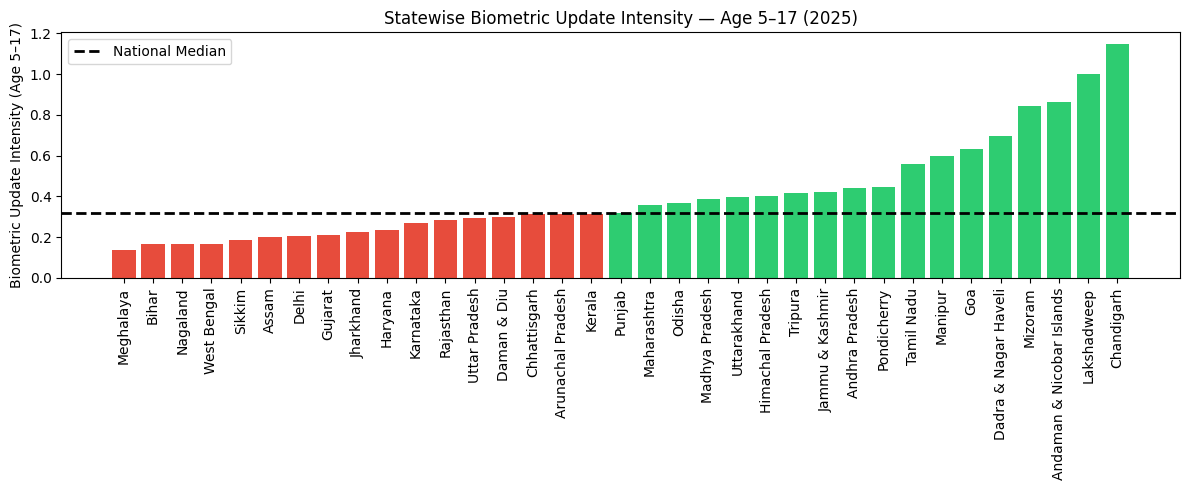

In [32]:
# BAR PLOT
# --------------------------------------------------
colors = df_sorted["intensity_category"].map({
    "High Intensity": "#2ecc71",  # green
    "Low Intensity": "#e74c3c"    # red
})

plt.figure(figsize=(12, 5))
plt.bar(
    df_sorted["state"],
    df_sorted["bio_update_intensity_5_17"],
    color=colors
)

plt.axhline(
    median_intensity,
    color="black",
    linestyle="--",
    linewidth=2,
    label="National Median"
)

plt.xticks(rotation=90)
plt.ylabel("Biometric Update Intensity (Age 5–17)")
plt.title("Statewise Biometric Update Intensity — Age 5–17 (2025)")
plt.legend()
plt.tight_layout()
plt.show()




In [33]:
#TABLE VISUAL
# --------------------------------------------------
intensity_table = df_sorted[[
    "state",
    "age_5_17_2025",
    "Total_2025",
    "bio_update_intensity_5_17",
    "intensity_category"
]]

intensity_table["bio_update_intensity_5_17"] = (
    intensity_table["bio_update_intensity_5_17"].round(4)
)

def color_intensity(val):
    if val == "High Intensity":
        return "background-color: #d4edda"  # green
    else:
        return "background-color: #f8d7da"  # red

styled_intensity_table = (
    intensity_table
    .style
    .applymap(color_intensity, subset=["intensity_category"])
    .format({
        "age_5_17_2025": "{:,.0f}",
        "Total_2025": "{:,.0f}",
        "bio_update_intensity_5_17": "{:.4f}"
    })
)

styled_intensity_table

/tmp/ipython-input-1600705250.py:24: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_intensity, subset=["intensity_category"])


,state,age_5_17_2025,Total_2025,bio_update_intensity_5_17,intensity_category
23,Meghalaya,"270,612","36,531",0.1350,Low Intensity
4,Bihar,"13,462,349","2,208,141",0.1640,Low Intensity
25,Nagaland,"196,365","32,561",0.1658,Low Intensity
38,West Bengal,"6,257,626","1,040,512",0.1663,Low Intensity
31,Sikkim,"63,967","11,932",0.1865,Low Intensity
3,Assam,"3,007,578","596,624",0.1984,Low Intensity
9,Delhi,"2,707,738","556,237",0.2054,Low Intensity
11,Gujarat,"7,010,213","1,460,655",0.2084,Low Intensity
15,Jharkhand,"3,890,170","876,613",0.2253,Low Intensity
12,Haryana,"2,947,546","693,667",0.2353,Low Intensity


###🔴 States with Low Biometric Update Intensity (Age 5–17)

### Under-updating states

In [34]:
low_intensity_states = df_sorted[
    df_sorted["intensity_category"] == "Low Intensity"
][["state", "bio_update_intensity_5_17"]]

low_intensity_states


,state,bio_update_intensity_5_17
23,Meghalaya,0.134994
4,Bihar,0.164023
25,Nagaland,0.165819
38,West Bengal,0.166279
31,Sikkim,0.186534
3,Assam,0.198374
9,Delhi,0.205425
11,Gujarat,0.208361
15,Jharkhand,0.225341
12,Haryana,0.235337


### 🟢 States with High Biometric Update Intensity (Age 5–17)

In [35]:
high_intensity_states = df_sorted[
    df_sorted["intensity_category"] == "High Intensity"
][["state", "bio_update_intensity_5_17"]]

high_intensity_states


,state,bio_update_intensity_5_17
29,Punjab,0.315755
21,Maharashtra,0.359281
26,Odisha,0.366719
20,Madhya Pradesh,0.384504
36,Uttarakhand,0.398551
13,Himachal Pradesh,0.403083
34,Tripura,0.418241
14,Jammu & Kashmir,0.418704
1,Andhra Pradesh,0.440177
28,Pondicherry,0.445840


**Hypothesis:** States with high biometric update intensity (Age 5–17) that also show high volatility are likely experiencing campaign-driven or compliance-triggered surges, rather than steady lifecycle-based updates.

## D. Linking High Biometric Update Intensity with Volatility and Trend Patterns

This section builds on the previous analyses to understand **why certain states show very high biometric update intensity (Age 5–17)**.

Rather than treating high intensity as inherently positive or negative, the analysis tests whether these updates occur:
- **Steadily over time**, or
- **In short, sharp sudden bursts**, indicating externally triggered activity.

### Analytical Approach

The analysis combines three signals from previous parts of analyysis:
- **Update Intensity** (updates relative to cohort population)
- **Volatility Risk Classification** (stability vs reactivity of updates)
- **Monthly Trend Plots** (visual confirmation of peaks and identifying timing-months showing peaks)

States that show **high intensity, high volatility, and visible spikes** are examined further to assess whether:
- Update behaviour is campaign-driven, or
- Triggered by policy or compliance deadlines (e.g., school-based MBU drives)

This layered approach helps distinguish **organic lifecycle updates** from **reactive enrolment behaviour**.


In [ ]:
# 1. Filter High Intensity (Age 5–17) states

# 2. Join with biometric- volatility risk classification

# Keep only:
# Moderate / Reactive( High volume + High CV states)

# 3. For each state:
# Identify peak month(s):Month with max updates

# 4. Compute % increase vs state’s monthly average

In [62]:
# Identify campaign-driven high MBU states

import pandas as pd

MONTHS = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

# Load required datasets
# The variable 'high_intensity_states' from previous execution became a list.
# We need the DataFrame from which that list was derived.
# Assuming 'df_sorted' DataFrame from previous cells is available and contains 'intensity_category'.
high_intensity_df = df_sorted[df_sorted["intensity_category"] == "High Intensity"].copy()

vol_df = bio_risk_df.copy()
trend_df = statewise_bio_updates_monthly_aggregated.copy()

# Filter high-intensity states: get the list of state names from the correct DataFrame
high_intensity_states_list = high_intensity_df["state"].tolist()

# Focus on reactive volatility states
reactive_states = vol_df[
    vol_df["risk_category"] == "Moderate / Reactive"
]["state"].tolist()

target_states = set(high_intensity_states_list).intersection(reactive_states) # Use the correct list

# Extract peak months and surge magnitude
results = []

for _, row in trend_df.iterrows():
    state = row["state"]
    if state not in target_states:
        continue

    monthly = row[MONTHS]
    # Convert monthly values to numeric to ensure calculations work correctly
    monthly = pd.to_numeric(monthly, errors='coerce') # 'coerce' will turn non-numeric values into NaN

    avg_updates = monthly.mean()
    peak_month = monthly.idxmax()
    peak_value = monthly.max()

    # Handle cases where avg_updates might be zero or NaN to prevent division by zero or NaN results
    if avg_updates == 0 or pd.isna(avg_updates):
        surge_ratio = 0
        pct_increase = 0
    else:
        surge_ratio = peak_value / avg_updates
        pct_increase = ((peak_value - avg_updates) / avg_updates) * 100

    results.append({
        "state": state,
        "peak_month": peak_month,
        "peak_updates": int(peak_value) if not pd.isna(peak_value) else 0, # Ensure int conversion is safe
        "avg_monthly_updates": int(avg_updates) if not pd.isna(avg_updates) else 0, # Ensure int conversion is safe
        "surge_multiplier": round(surge_ratio, 2),
        "percent_increase_over_avg": round(pct_increase, 1)
    })

campaign_signal_df = pd.DataFrame(results).sort_values(
    "surge_multiplier", ascending=False
)

campaign_signal_df

,state,peak_month,peak_updates,avg_monthly_updates,surge_multiplier,percent_increase_over_avg
5,Madhya Pradesh,Jul,1004035,493647,2.03,103.4
6,Punjab,Jul,277717,144972,1.92,91.6
3,Jammu & Kashmir,Dec,123664,65970,1.87,87.5
4,Lakshadweep,Apr,706,401,1.76,75.8
2,Himachal Pradesh,Mar,55452,33019,1.68,67.9
0,Andaman & Nicobar Islands,Jul,2828,1724,1.64,64.0
1,Goa,Apr,9312,5699,1.63,63.4


## Campaign-Linked Surges in Biometric Update Activity (Age 5–17)

The previously identified states with high biometric update intensity and high volatility were examined for plausible external drivers leading update spikes in 2025.

### Analytical Scope and Evaluation Criteria
- Review of national policy measures relevant to Aadhaar Mandatory Biometric Updates (MBU) during 2025  
- State-level initiatives, school-linked drives with potential to influence update volumes  
- Temporal alignment analysis between observed surge months and documented campaign or policy activity  

### Evidence-Based Policy and Administrative Drivers

1. **National Fee Waiver for Child Biometric Updates (Oct 1, 2025 – Sep 30, 2026)**  
   UIDAI announced that biometric updates for children aged 5–17 would be **completely free of charge** during this period, significantly reducing cost barriers and providing a strong incentive for families to update their children’s Aadhaar biometrics.

2. **State-Level School-Centric Implementation Initiatives**  
   Several states operationalized MBU compliance through coordination with education departments and school systems:
   - **Chandigarh:** Implementation of a structured, large-scale school-based biometric update drive in collaboration with UIDAI and local authorities.  
   - **Goa:** Integration of Aadhaar MBU planning with the UDISE+ platform to facilitate systematic execution within schools.  
   - **Karnataka:** Issuance of administrative directives mandating completion of child biometric updates within a defined timeline.  
   - **National UIDAI Outreach:** Multiple advisories encouraging schools across states to actively facilitate timely MBUs using institutional mechanisms such as UDISE+.  

### Interpretation of Observed Update Patterns
- The **biometric fee waiver** aligns with widespread increases in update volumes, particularly from Q4 2025 onward, indicating a strong structural effect.
- **School-driven administrative initiatives** correspond with discrete monthly peaks in multiple high-intensity states, suggesting targeted campaign impacts rather than organic demand alone.


### Policy Implications and Strategic Recommendations

- **Extend coordinated school-linked update campaigns** to states with **low MBU intensity** to drive predictable and substantive increases in updates.
- **Maintain or expand the biometric update fee waiver policy** for targeted periods to reduce socio-economic barriers, especially in regions with access constraints.
- States with documented surge responses (e.g., Madhya Pradesh, Punjab, Tripura, Jammu & Kashmir, Odisha, Uttarakhand) demonstrate that **timely policy and administrative coordination leads to measurable increases in updates**.

Peak months in these states record **1.8×–3× increases** over their own monthly averages
- Incorporate **awareness and behavioural nudges** alongside operational campaigns, given evidence of UIDAI’s engagement with behavioural insights to promote MBUs. :contentReference

This analysis strengthens the narrative that **policy and campaigns can significantly increase biometric update coverage**, and similar strategies should be considered for regions lagging in update intensity (**States with Low Biometric Update Intensity Age 5–17: Under-updating states**) identified and listed by the analysis.

